In [28]:
# import library
library("tidyverse")

# Exploratory Data Analysis (EDA)
Explore the dataset using the **glimpse** function and create informative visualizations with **ggplot2**

In [29]:
# Read csv file and save in 'churndata' variable
churndata <- read.csv("churn.csv")

In [30]:
# Create a function for showing basic information
df_info <- function(df, sample_size = 5) {
  cat("Data Frame Information:\n")
  cat("Number of Rows: ", nrow(df), "\n")
  cat("Number of Columns: ", ncol(df), "\n\n")
  
  cat("Column Information:\n")
  for (col in names(df)) {
    cat(sprintf("Column: %s | Type: %s | Non-null Count: %d | Sample: %s\n", 
                col, class(df[[col]]), sum(!is.na(df[[col]])), toString(head(df[[col]], sample_size))))
  }
  
  cat("\nSummary Statistics:\n")
  print(summary(df))
  
  cat("\nMissing Values (NA or NULL):\n")
  print(sapply(df, function(x) sum(is.na(x) | x == "")))
}

# Apply df_info function on chur
df_info(churndata)

Data Frame Information:
Number of Rows:  5000 
Number of Columns:  18 

Column Information:
Column: churn | Type: character | Non-null Count: 5000 | Sample: No, No, No, No, No
Column: accountlength | Type: integer | Non-null Count: 5000 | Sample: 128, 107, 137, 84, 75
Column: internationalplan | Type: character | Non-null Count: 5000 | Sample: no, no, no, yes, yes
Column: voicemailplan | Type: character | Non-null Count: 5000 | Sample: yes, yes, no, no, no
Column: numbervmailmessages | Type: integer | Non-null Count: 5000 | Sample: 25, 26, 0, 0, 0
Column: totaldayminutes | Type: numeric | Non-null Count: 5000 | Sample: 265.1, 161.6, 243.4, 299.4, 166.7
Column: totaldaycalls | Type: integer | Non-null Count: 5000 | Sample: 110, 123, 114, 71, 113
Column: totaldaycharge | Type: numeric | Non-null Count: 5000 | Sample: 45.07, 27.47, 41.38, 50.9, 28.34
Column: totaleveminutes | Type: numeric | Non-null Count: 5000 | Sample: 197.4, 195.5, 121.2, 61.9, 148.3
Column: totalevecalls | Type: inte

Rows: 5,000
Columns: 18
$ churn                      <fct> No, No, No, No, No, No, No, No, No, No, Yes…
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <fct> no, no, no, yes, yes, yes, no, yes, no, yes…
$ voicemailplan              <fct> yes, yes, no, no, no, no, yes, no, no, yes,…
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

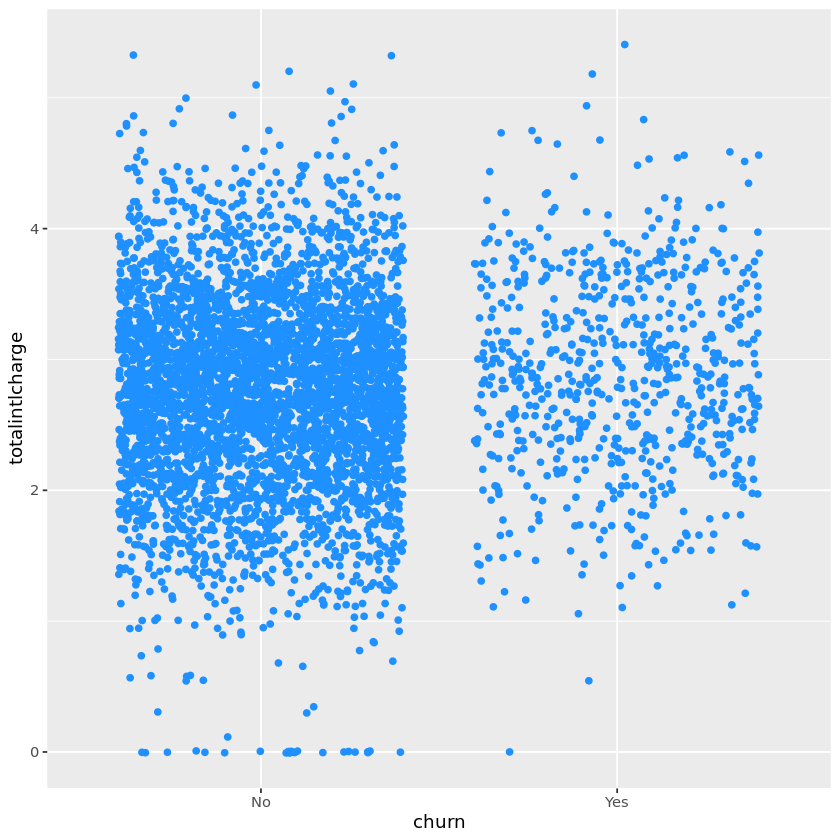

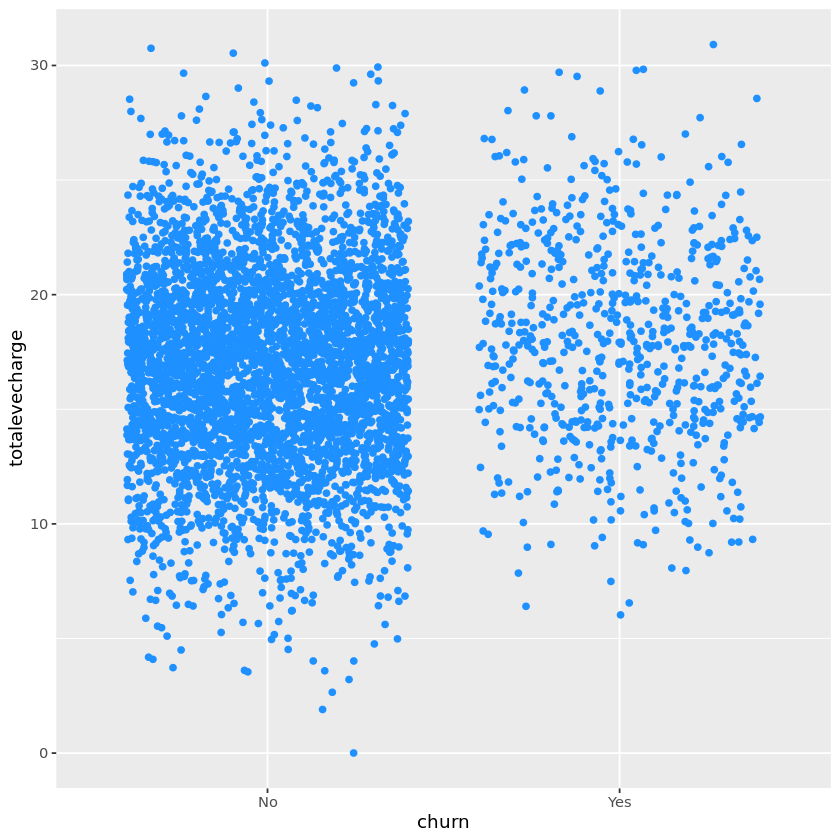

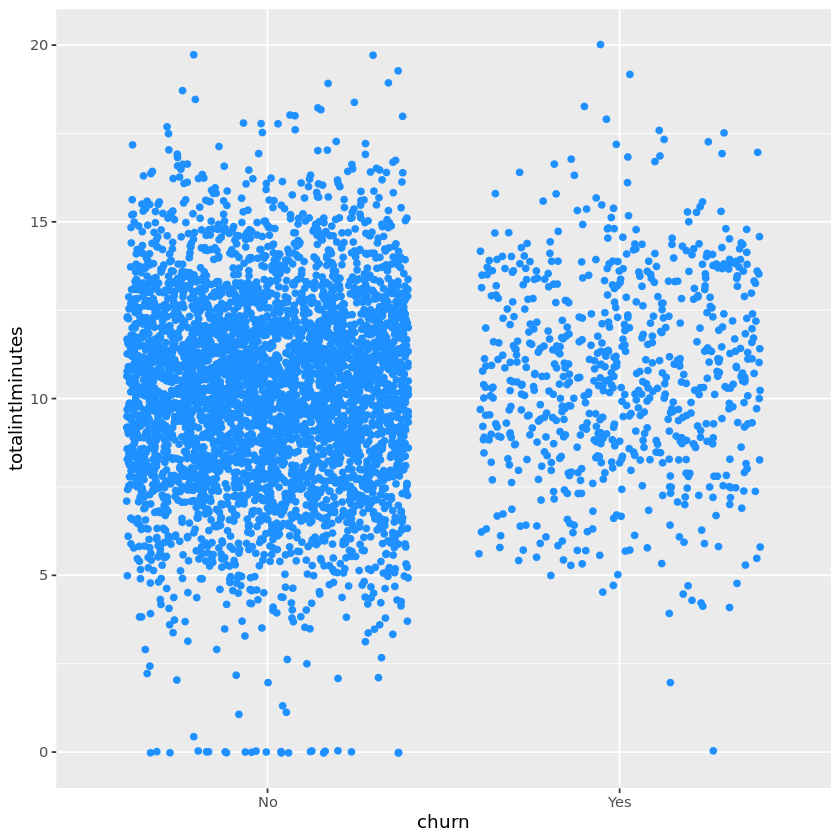

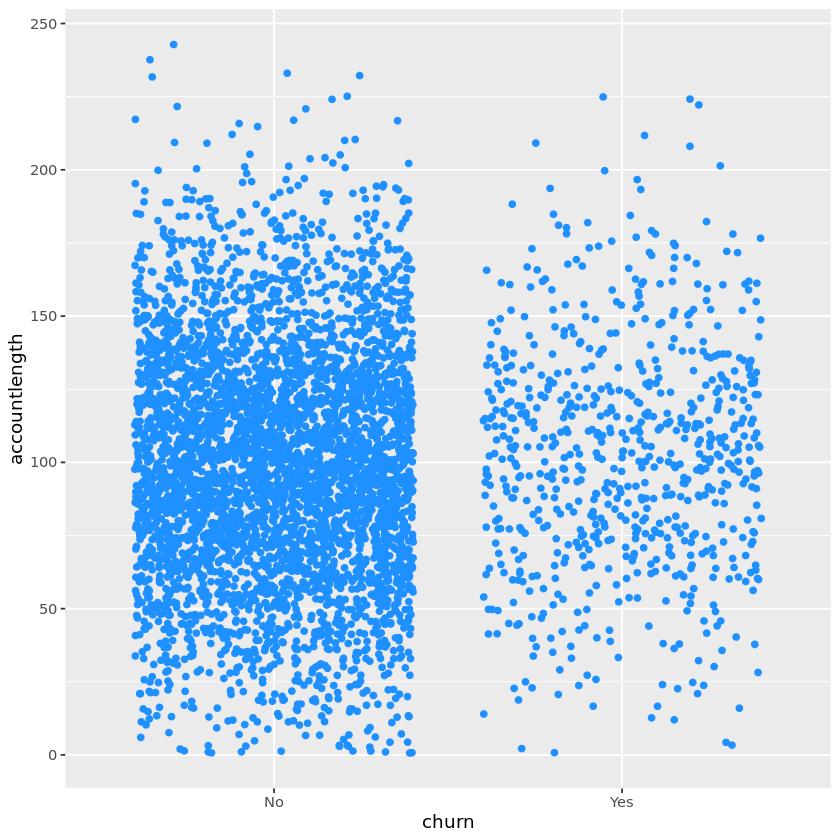

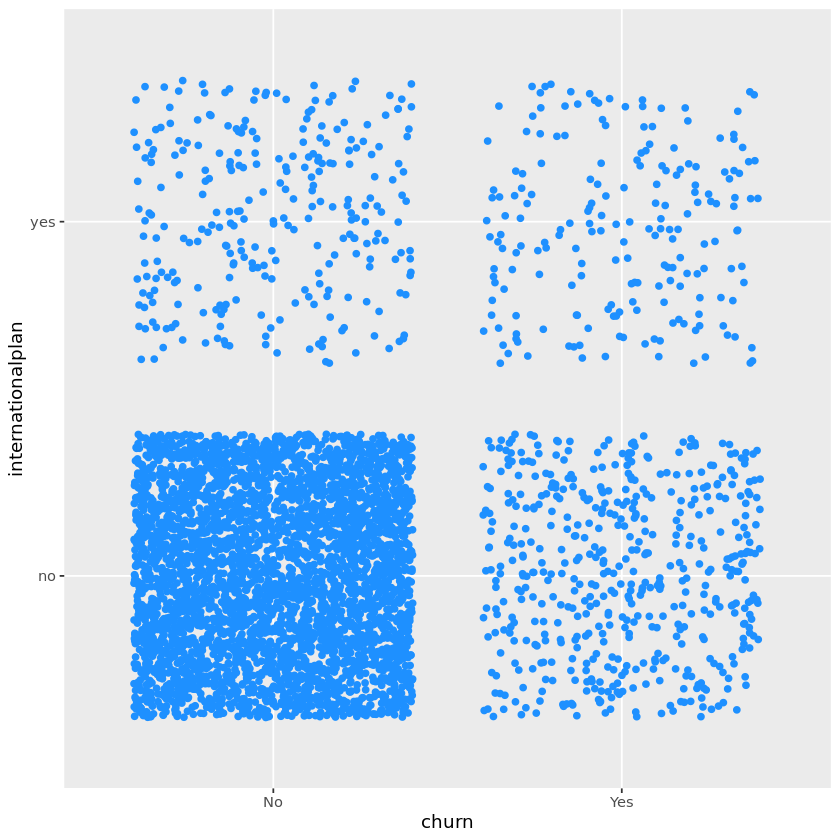

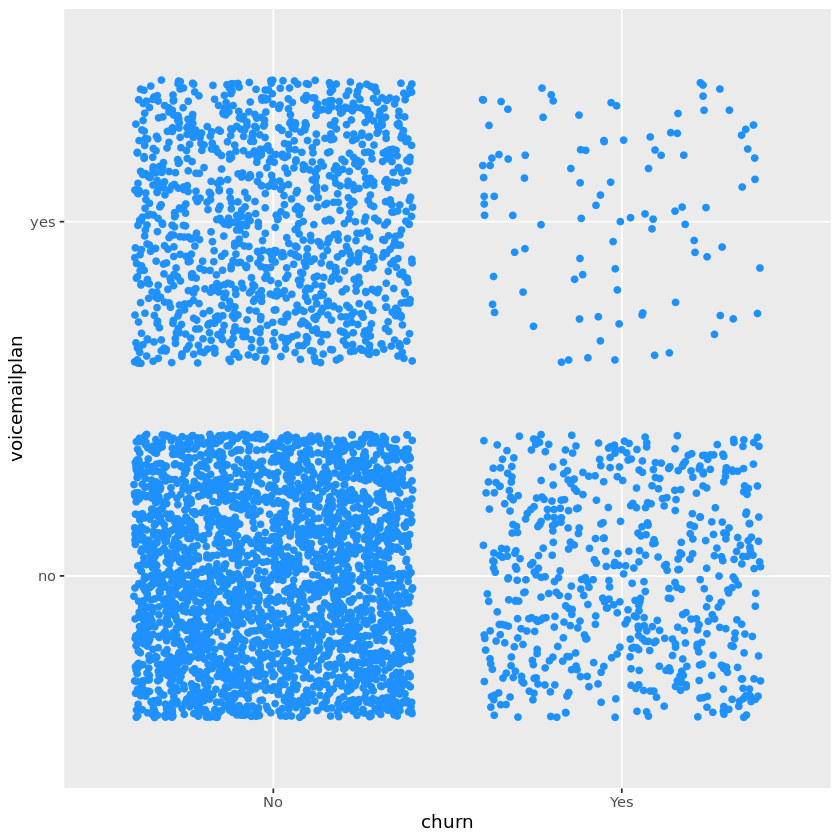

In [31]:
# Convert variables (character) to factor
churndata$churn <- factor(churndata$churn)
churndata$voicemailplan <- factor(churndata$voicemailplan)
churndata$internationalplan <- factor(churndata$internationalplan)
# Show summary after converting variables
glimpse(churndata)

# explore graph
ggplot(churndata, aes(churn,totalintlcharge)) + geom_jitter(color = "dodgerblue")
ggplot(churndata, aes(churn,totalevecharge)) + geom_jitter(color = "dodgerblue")
ggplot(churndata, aes(churn,totalintlminutes)) + geom_jitter(color = "dodgerblue")
ggplot(churndata, aes(churn,accountlength)) + geom_jitter(color = "dodgerblue")
ggplot(churndata, aes(churn,internationalplan)) + geom_jitter(color = "dodgerblue")
ggplot(churndata, aes(churn,voicemailplan)) + geom_jitter(color = "dodgerblue")

# Modelling

### - Split the dataset into training and testing sets to facilitate model evaluation

In [32]:
n <- nrow(churndata)     # calculate no. rows
id <- sample(1:n, size = n*0.8)     # random sample (size 80%) from 1 to n
train_data <- churndata[id, ]    # select data from id (random sample) for training
test_data <- churndata[-id, ]    # select data excluding a random sample for testing

# Show summary
glimpse(churndata)

Rows: 5,000
Columns: 18
$ churn                      <fct> No, No, No, No, No, No, No, No, No, No, Yes…
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <fct> no, no, no, yes, yes, yes, no, yes, no, yes…
$ voicemailplan              <fct> yes, yes, no, no, no, no, yes, no, no, yes,…
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

In [33]:
# quick survey the train_data
head(train_data)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
481,No,166,no,no,0,181.4,108,30.84,253.8,54,21.57,112.3,94,5.05,11.6,6,3.13,1
2072,No,132,no,no,0,181.1,121,30.79,314.4,109,26.72,246.7,81,11.10,4.2,9,1.13,2
299,No,113,no,no,0,215.5,129,36.64,218.7,117,18.59,207.1,91,9.32,6.6,9,1.78,4
3983,No,115,no,no,0,254.8,97,43.32,153.5,110,13.05,217.6,117,9.79,9.0,4,2.43,1
2454,No,134,no,yes,38,214.4,93,36.45,211.7,57,17.99,165.0,79,7.43,10.0,8,2.70,1
3720,No,69,no,no,0,243.3,101,41.36,109.2,99,9.28,176.9,138,7.96,9.3,3,2.51,0


In [34]:
# quick survey the test_data
head(test_data)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
5,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
11,Yes,65,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
21,No,147,no,no,0,155.1,117,26.37,239.7,93,20.37,208.8,133,9.40,10.6,4,2.86,0
22,Yes,77,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5
24,No,111,no,no,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
28,No,54,no,no,0,134.3,73,22.83,155.5,100,13.22,102.1,68,4.59,14.7,4,3.97,3


### - Fit a Logistic Regression model to the training dataset and evaluate its performance

In [35]:
## train model
logistic_model <- glm(churn ~ ., data = train_data, family = "binomial")
p_train <- predict(logistic_model, type = "response")
train_data$pred <- if_else(p_train >=0.5, "Yes", "No")
train_m <- table(train_data$pred, train_data$churn, dnn = c("predicted", "actual"))
cat("Accuracy of Train Model: ", (train_m[1,1] + train_m[2,2]) / sum(train_m))
cat("\nPrecission of Train Model: ", train_m[2,2] / (train_m[2,1] + train_m[2,2]))
cat("\nRecall of Train Model: ", train_m[2,2]/ (train_m[1,2] + train_m[2,2]))
cat("\nF1 of Train Model: ", 2* (0.58*0.21)/(0.58+0.21))

Accuracy of Train Model:  0.8705
Precission of Train Model:  0.5811518
Recall of Train Model:  0.2021858
F1 of Train Model:  0.3083544

### - Apply the trained logistic regression model to the testing dataset and assess its performance

In [36]:
# test model
p_test <- predict(logistic_model, newdata = test_data, type = "response")
test_data$pred <- if_else(p_test >= 0.5, "Yes", "No")
test_m <- table(test_data$churn, test_data$pred, dnn = c("predicted", "actual"))
cat("Accuracy of Test Model: ", (test_m[1,1] + test_m[2,2]) / sum(test_m))
cat("\nPrecission of Test Model: ", test_m[2,2] / (test_m[2,1] + test_m[2,2]))
cat("\nRecall of Test Model: ", test_m[2,2]/ (test_m[1,2] + test_m[2,2]))
cat("\nF1 of Test Model: ", 2* (0.22*0.55)/(0.22+0.55))

Accuracy of Test Model:  0.856
Precission of Test Model:  0.2025316
Recall of Test Model:  0.64
F1 of Test Model:  0.3142857

# K-Means Clustering

Rows: 5,000
Columns: 15
$ accountlength              <int> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ numbervmailmessages        <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <int> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcalls            <int> 91, 103, 104, 89, 121, 118, 118, 96, 90, 97…
$ totalnightcharge           <dbl> 11.01, 11.45, 7.32, 8.86, 8.41, 9.18, 9.57,…
$ totalintlminutes           <dbl> 10.0, 13.7, 12.2, 6.6, 10.1, 6.3, 7.5, 7.1,…
$ totalintlcalls

2492 2508

        real_churn
Clusters   No  Yes
       1 2221  271
       2 2072  436

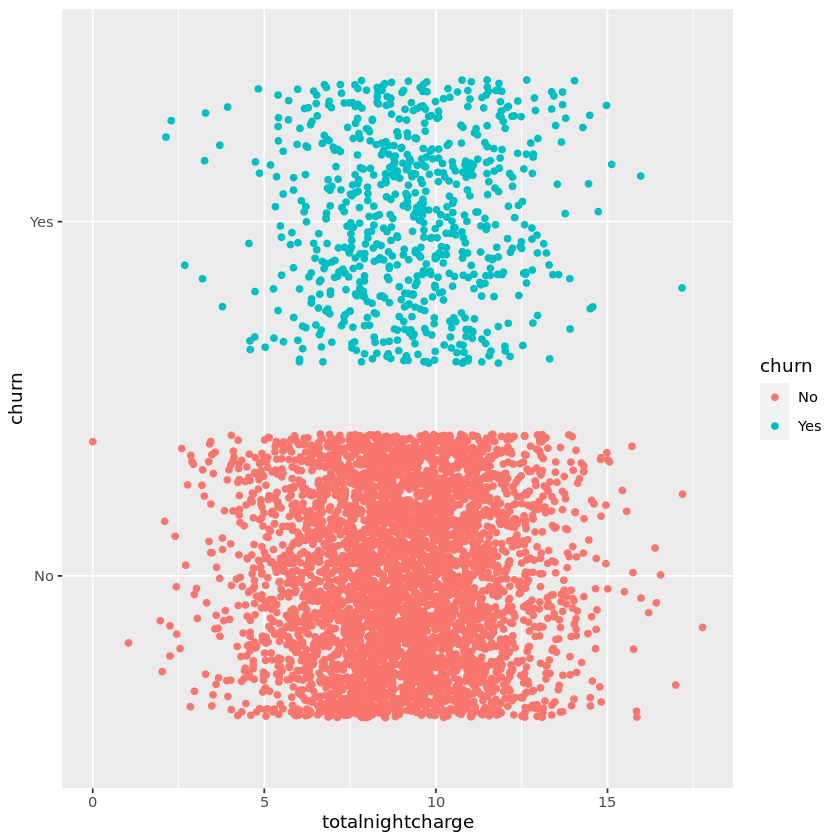

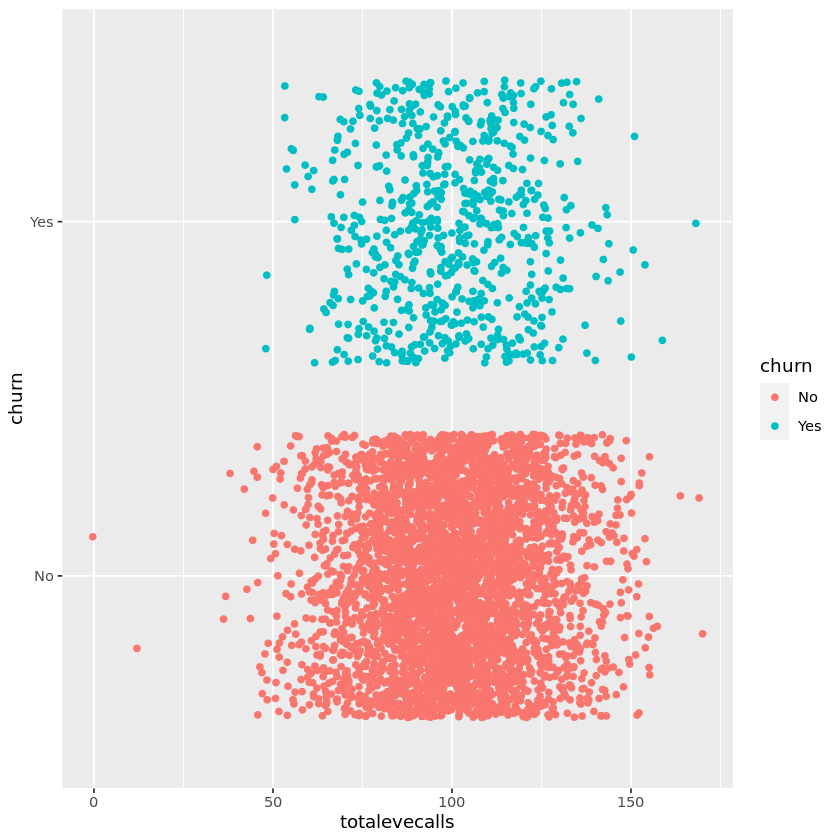

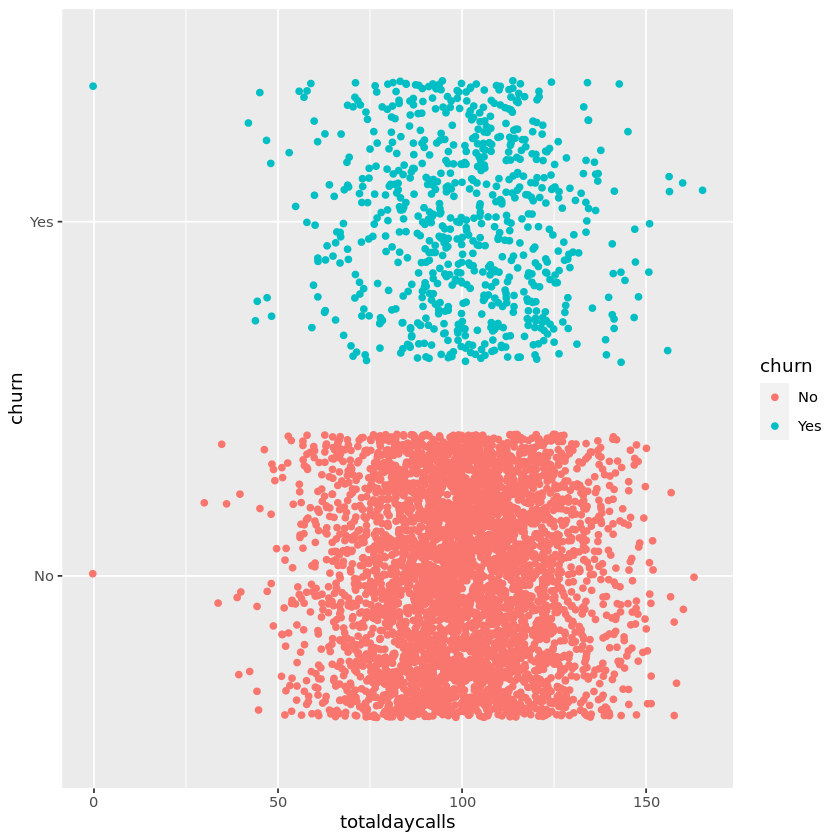

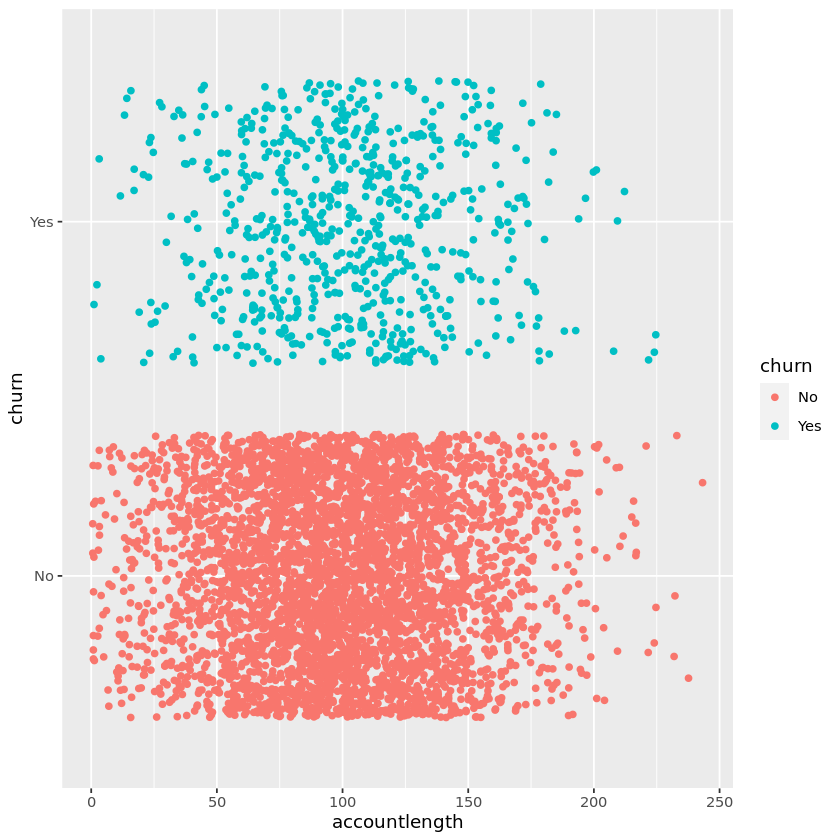

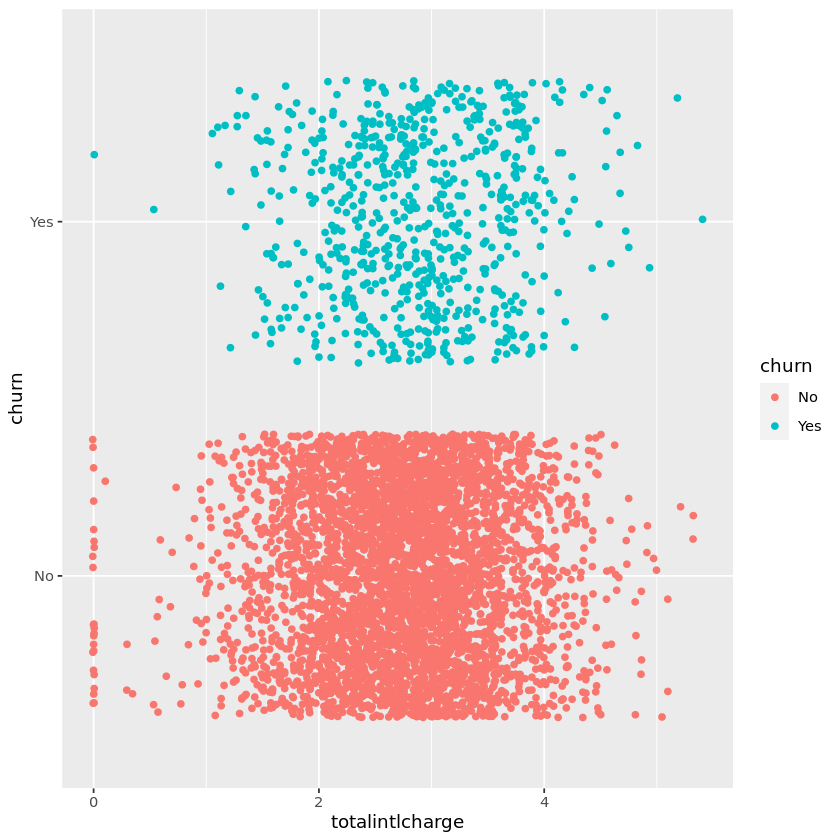

In [37]:
real_churn <- churndata$churn        # Create new variable by selecting only churn column (contains 'yes' and 'no')
churn_df <- churndata %>% 
  as_tibble() %>%                    # Create dataframe (tibble)
  select(-churn, -internationalplan, -voicemailplan)      # Select churndata exclude churn column
# Show summary
glimpse(churn_df)

# K-means Clustering
set.seed(42)                                 # Set the seed for the random number generator
km_model <- kmeans(churn_df, centers = 2)    # Create 2 clusters
km_model$size                                # Size of clusters
Clusters <- km_model$cluster
table(Clusters,real_churn)

ggplot(churndata, aes(totalnightcharge,churn, col = churn)) + geom_jitter()
ggplot(churndata, aes(totalevecalls,churn, col = churn)) + geom_jitter()
ggplot(churndata, aes(totaldaycalls,churn, col = churn)) + geom_jitter()
ggplot(churndata, aes(accountlength,churn, col = churn)) + geom_jitter()
ggplot(churndata, aes(totalintlcharge,churn, col = churn)) + geom_jitter()